# **Heart Attack Analysis & Prediction**

## About this dataset

- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    - thalach : maximum heart rate achieved

- target : 0= less chance of heart attack 1= more chance of heart attack


**NOTE: Check for the steps at the end of the notebook**

## Get the data

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# setting sns backgroud style
sns.set_style('darkgrid')

In [3]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the data set in `heart_data`
heart_data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Inspection

In [5]:
heart_data.shape

(303, 14)

In [6]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
heart_data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [10]:
heart_data.thall.value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

In [11]:
heart_data.slp.value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

In [12]:
# output percentages of 1s and 0s
heart_data.output.value_counts(normalize=True)*100

1    54.455446
0    45.544554
Name: output, dtype: float64

In [13]:
k = ['sex', 'cp', 'restecg']
for i in k:
    print(heart_data[i].value_counts())

1    207
0     96
Name: sex, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
1    152
0    147
2      4
Name: restecg, dtype: int64


**Box Plots of all columns except <i>output</i> column**

In [14]:
cols_list = list(heart_data.columns)
cols_list.pop(cols_list.index('output'))
cols_list

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']

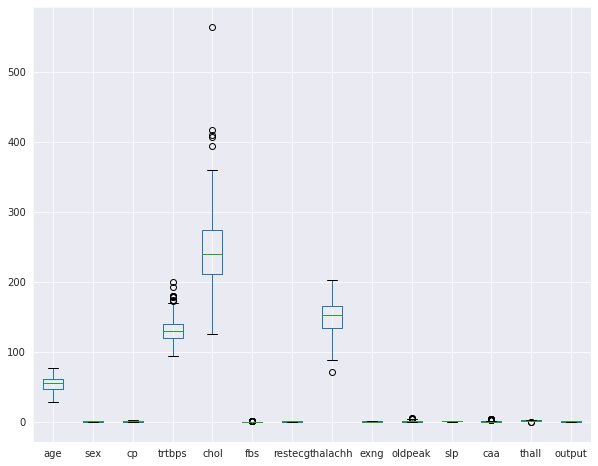

In [15]:
# boxplot of the data set
plt.figure(figsize=[10,8])
heart_data.boxplot()
plt.show()

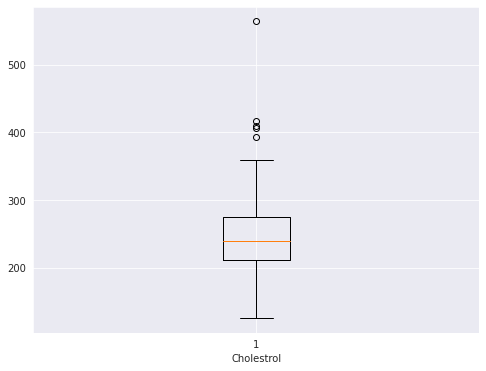

In [16]:
# boxplot of cholestrol
plt.figure(figsize=[8,6])
plt.boxplot(heart_data.chol)
plt.xlabel("Cholestrol")
plt.show()

In [17]:
heart_data.chol.quantile([0.25, 0.50, 0.75, 0.99, 0.998, 1.00])

0.250    211.000
0.500    240.000
0.750    274.500
0.990    406.740
0.998    475.212
1.000    564.000
Name: chol, dtype: float64

Lets remove outliers, i.e., remove Cholestrol level data greater than 99%tile

In [18]:
# heart_data[heart_data.chol > heart_data.chol.quantile([0.99]).values[0]]

In [19]:
# # dropping rows greater than 99%tile cholestrol
# heart_data = heart_data[heart_data.chol <= heart_data.chol.quantile([0.99]).values[0]]

In [20]:
heart_data.shape

(303, 14)

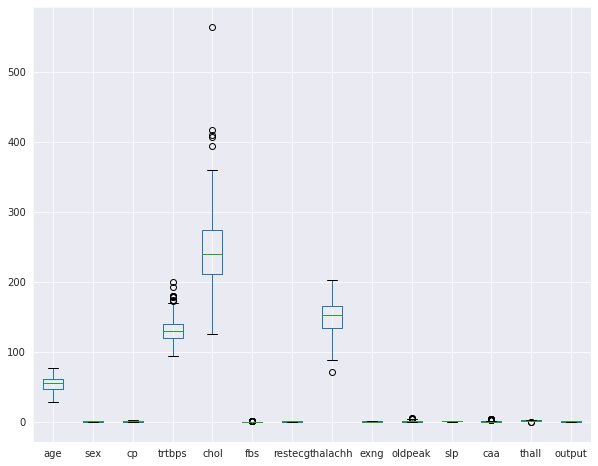

In [21]:
# boxplot of the data set
plt.figure(figsize=[10,8])
heart_data.boxplot()
plt.show()

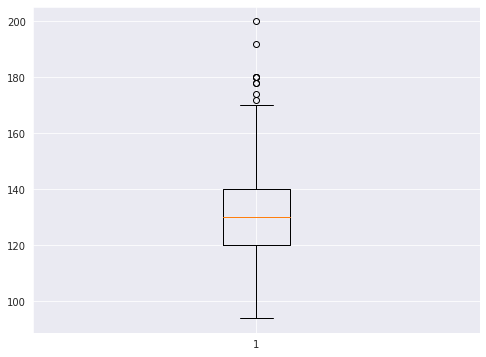

In [22]:
# check outliers using boxplot for trtbps
plt.figure(figsize=[8,6])
plt.boxplot(heart_data.trtbps)
plt.show()

In [23]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Visualization

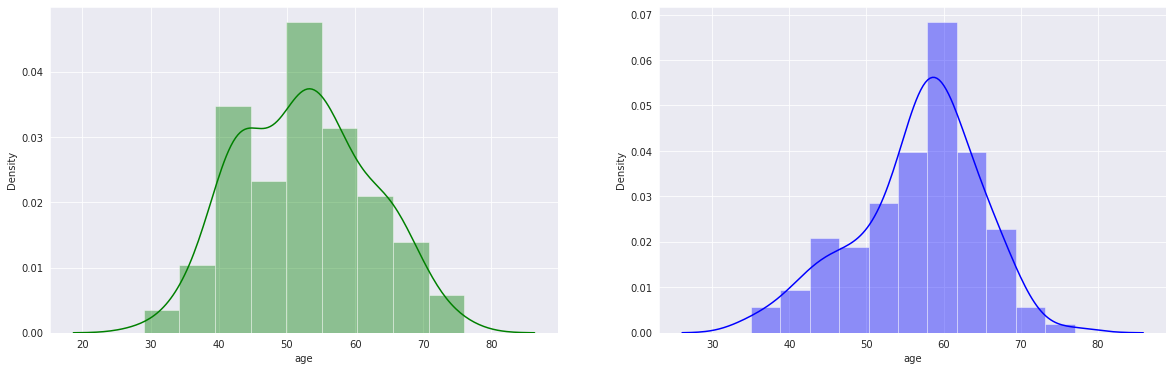

In [24]:
# age distribution among outputs
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
sns.distplot(heart_data[heart_data.output == 1]['age'], color='g')
plt.subplot(1,2,2)
sns.distplot(heart_data[heart_data.output == 0]['age'], color='b')

plt.show()

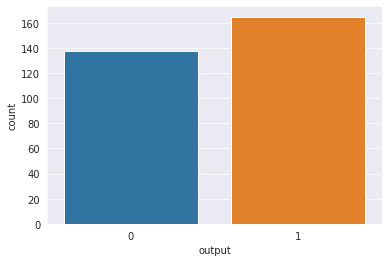

In [25]:
# check 'outputs'

sns.countplot(data=heart_data, x='output')
plt.show()

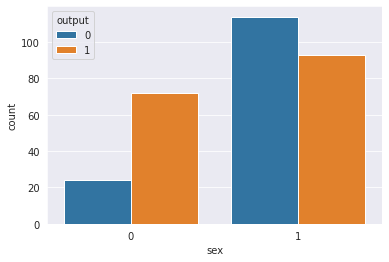

In [26]:
# check outputs based on sex

# plt.figure(figsize=[10,6])
sns.countplot(data=heart_data, x='sex', hue='output')
plt.show()

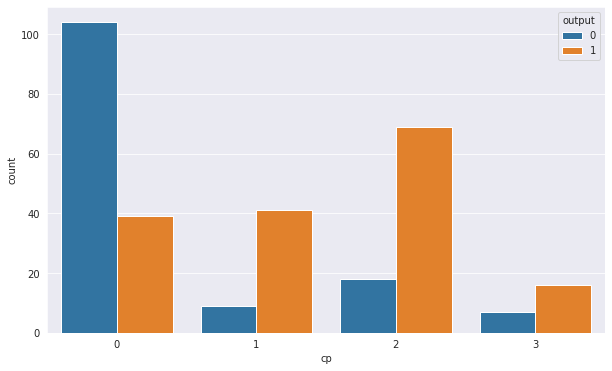

In [27]:
# check Chest pain

plt.figure(figsize=[10,6])
sns.countplot(data=heart_data, x='cp', hue='output')
plt.show()

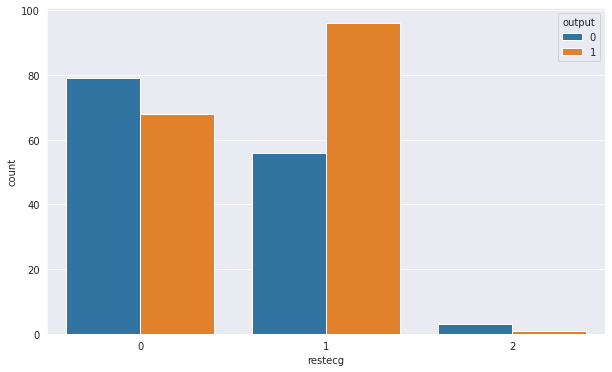

In [28]:
# check resting electrocardiographic

plt.figure(figsize=[10,6])
sns.countplot(data=heart_data, x='restecg', hue='output')
plt.show()

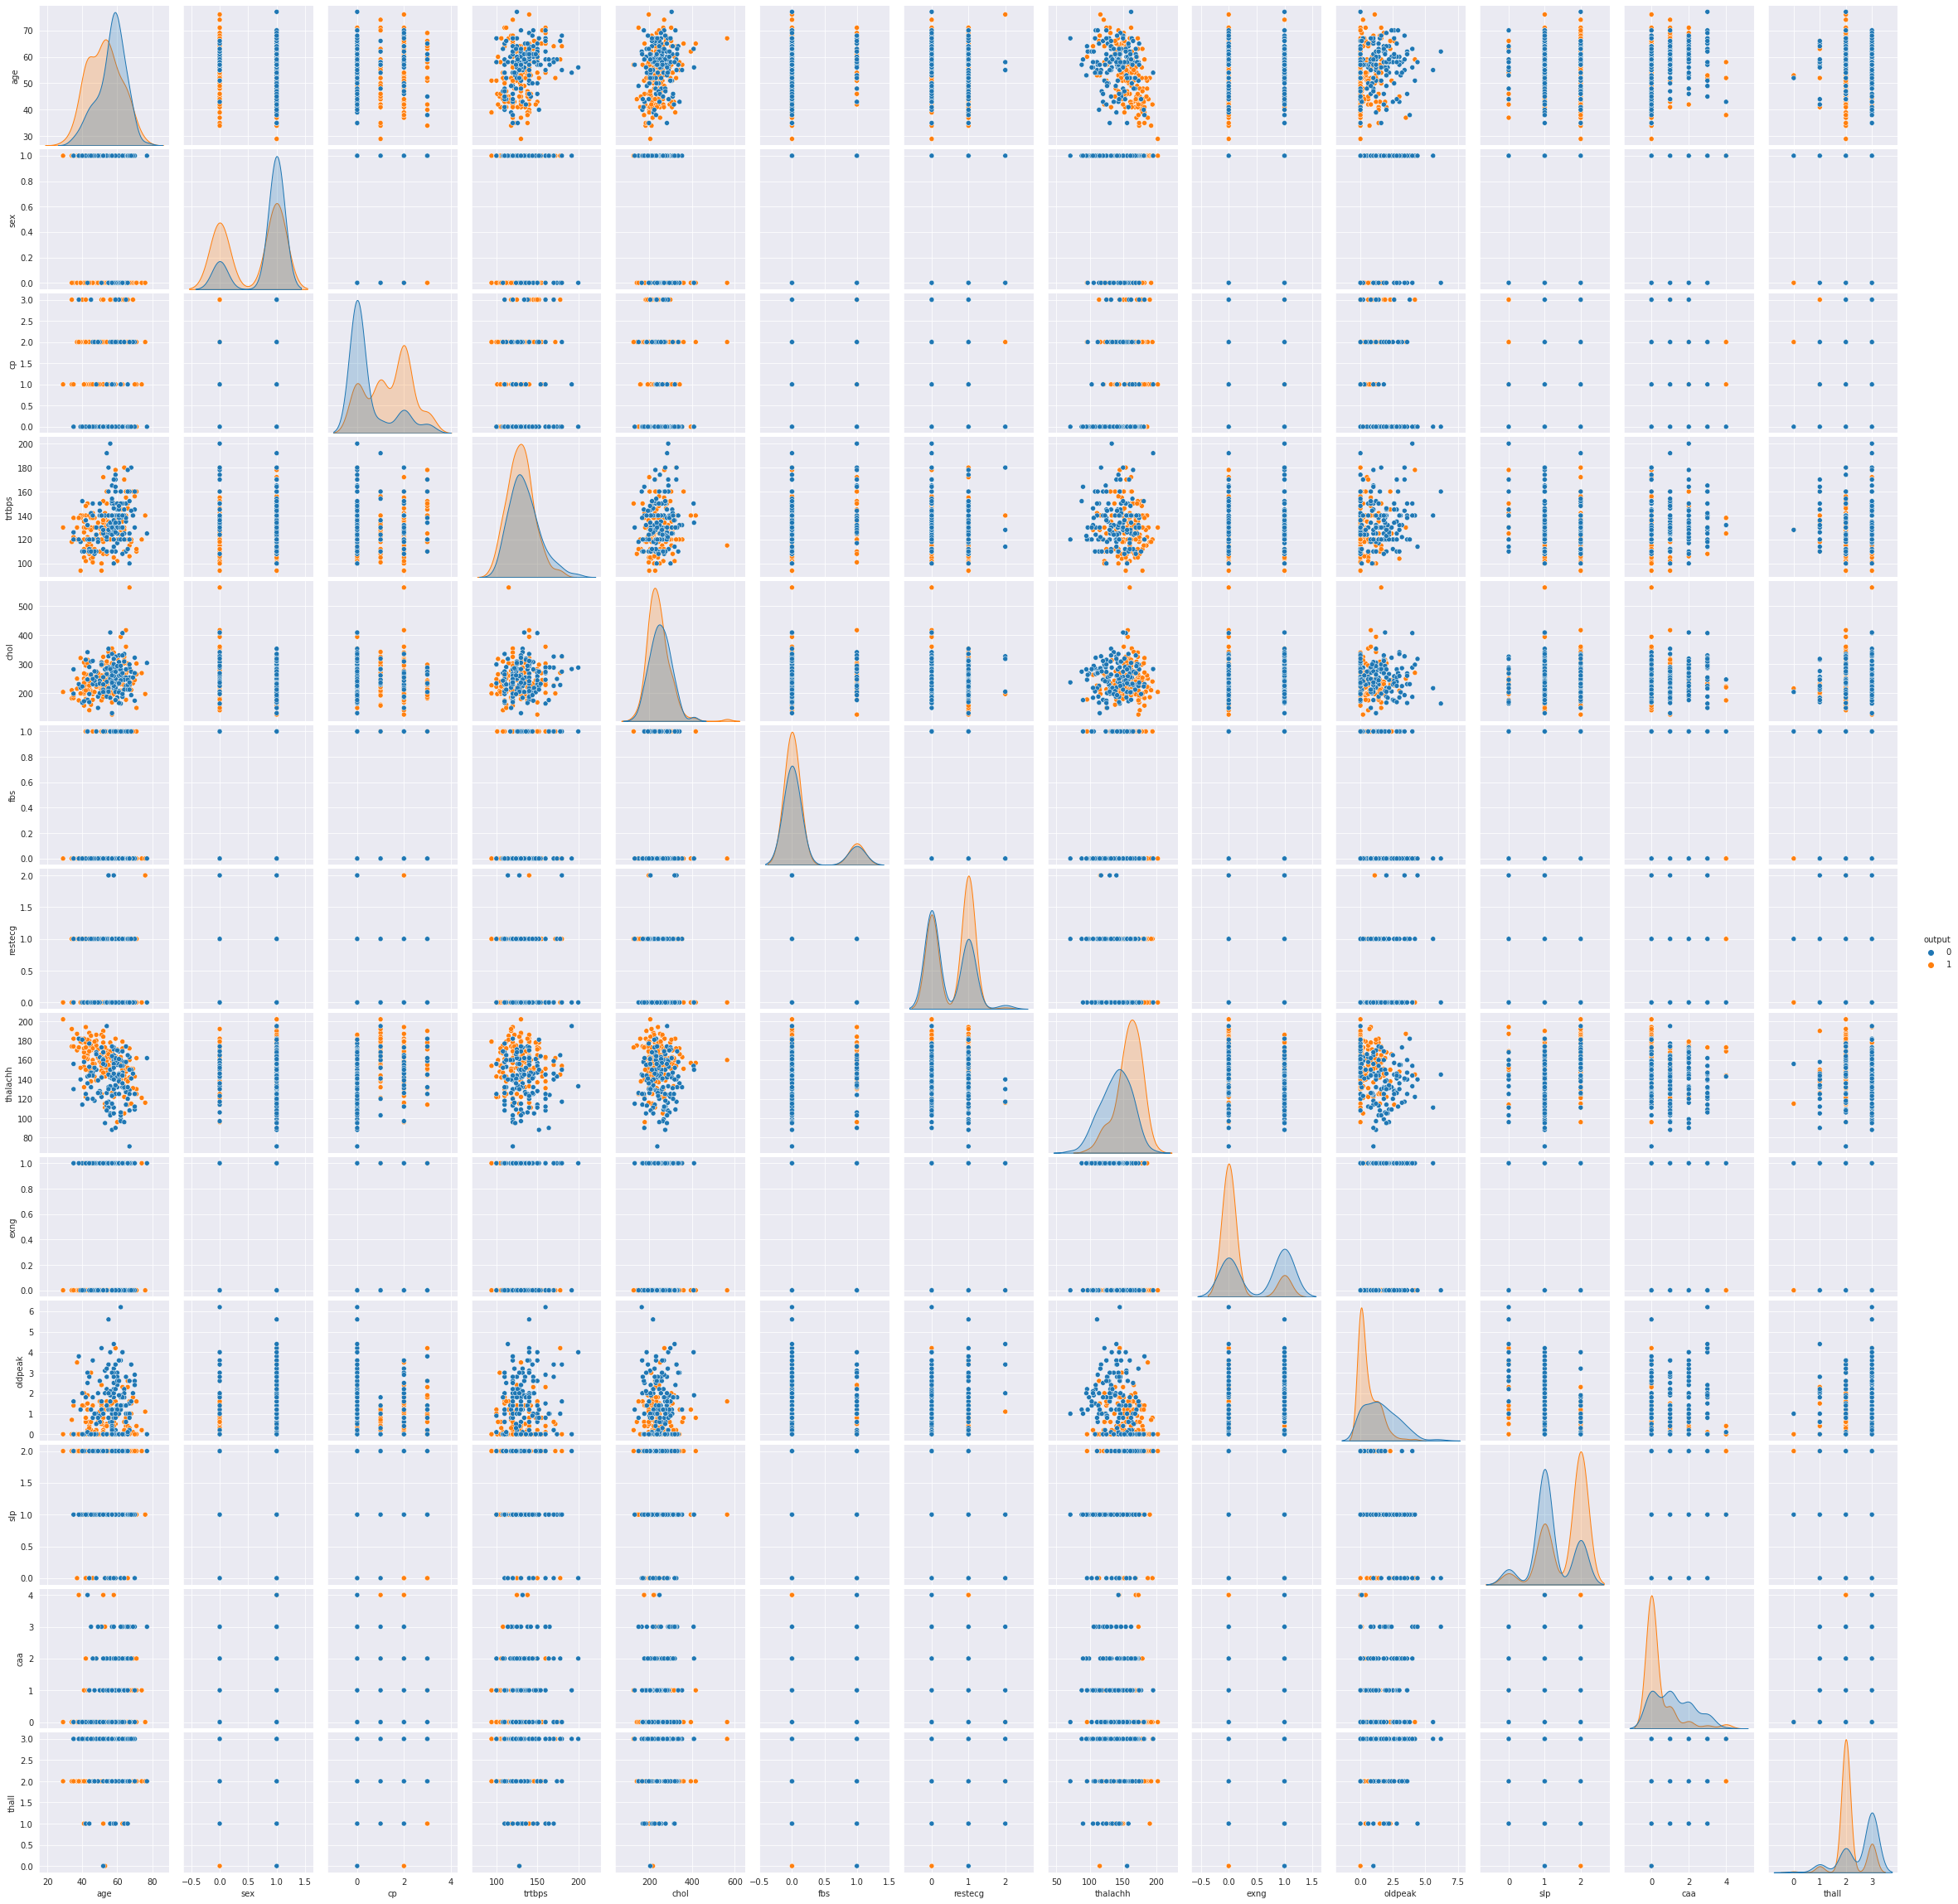

In [29]:
# pairplot on numerical columns
all_cols = heart_data.columns
sns.pairplot(heart_data[all_cols], hue='output')
plt.show()

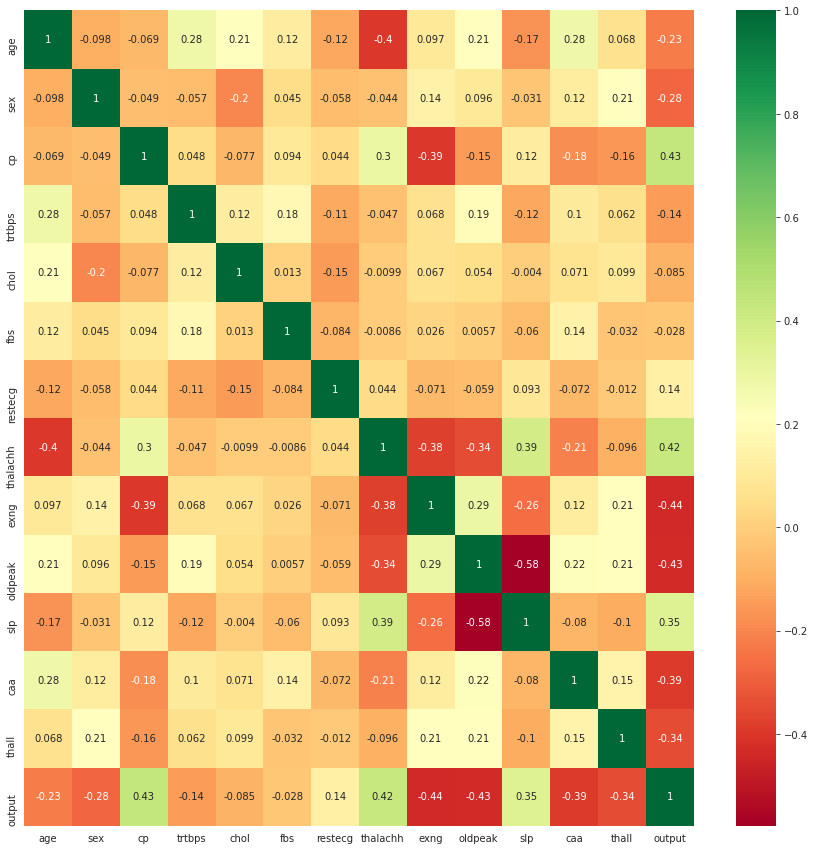

In [30]:
# correlation heatmat
plt.figure(figsize=[15,15])
sns.heatmap(heart_data.corr(), annot=True, cmap='RdYlGn')
plt.show()

## Data Preprocessing

In [31]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
heart_data.shape

(303, 14)

## Spliting to Train and Test

In [33]:
# importing train test split library
from sklearn.model_selection import train_test_split

In [34]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [35]:
X = heart_data.drop('output', axis=1)
y = heart_data.output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Scaling numerical columns

In [36]:
# num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak',]
num_cols = list(heart_data.columns)
num_cols.pop(num_cols.index('output'))

# importing scaling library
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

# create scaler object
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Building Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
loglm = LogisticRegression()

loglm.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation

In [39]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve

In [40]:
# evaluation function
def evaluation(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*50)
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Accuracy of TRAIN data:",accuracy_score(y_train, y_train_pred))
    print("="*50)
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print("Accuracy of TEST data:",accuracy_score(y_test, y_test_pred))
    print("="*50)
    
    # Plot ROC_AUC Curve
    plot_roc_curve(model, X_test, y_test)
    plt.title('ROC_AUC Curve', fontsize=16)
    plt.show()

### Prediction

[[ 74  18]
 [ 11 109]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.84        92
           1       0.86      0.91      0.88       120

    accuracy                           0.86       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212

Accuracy of TRAIN data: 0.8632075471698113
[[37  9]
 [ 4 41]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        46
           1       0.82      0.91      0.86        45

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

Accuracy of TEST data: 0.8571428571428571


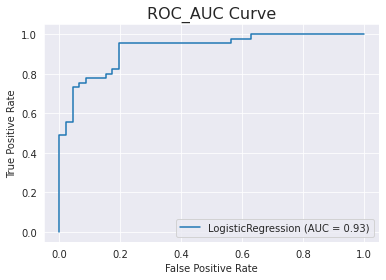

In [41]:
evaluation(loglm)

- **Accuracy for Logistic Regression model is 85%**

## Building K-Nearset Neighbors Model

In [42]:
# importing library
from sklearn.neighbors import KNeighborsClassifier

### Choosing a K Value 

Let's go ahead and use the elbow method to pick a good K Value:

In [43]:
# iterating knn model for all values of k from 1-39
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

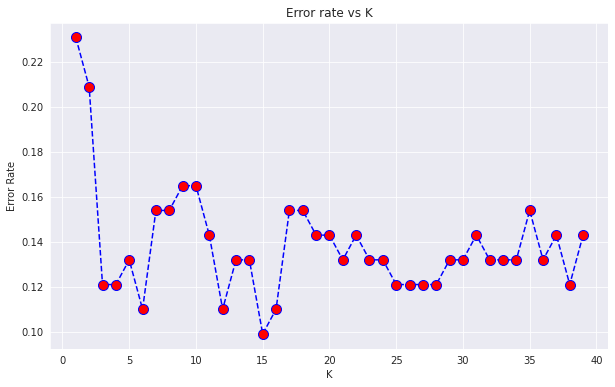

In [44]:
# ploting the error_rate

plt.figure(figsize=[10,6])
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

- We can see that error rate is low at k=15.

#### Let's implement KNN again at k=15

In [45]:
# building knn and fit the model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

[[ 68  24]
 [  9 111]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        92
           1       0.82      0.93      0.87       120

    accuracy                           0.84       212
   macro avg       0.85      0.83      0.84       212
weighted avg       0.85      0.84      0.84       212

Accuracy of TRAIN data: 0.8443396226415094
[[40  6]
 [ 3 42]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        46
           1       0.88      0.93      0.90        45

    accuracy                           0.90        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.90      0.90      0.90        91

Accuracy of TEST data: 0.9010989010989011


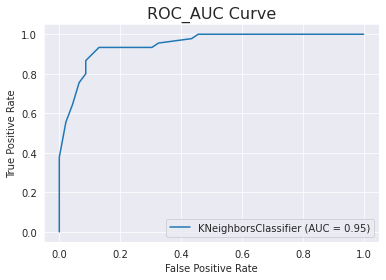

In [46]:
# Evaluation
evaluation(knn)

- **Accuracy for K-Nearest Neighbors model is 90%**

## Random Forest Classifier Model

In [47]:
# import 
from sklearn.ensemble import RandomForestClassifier

### Using Hyper-Parameter Tuning

In [48]:
# using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [49]:
params = {
    'max_depth': [5, 10, 20, 30, 50],
    'min_samples_leaf': [10, 20, 30, 50, 100],
    'max_features': [2, 5, 8, 11, 13],
    'n_estimators': [10, 30, 50, 100, 200]}

rfm_basic = RandomForestClassifier(random_state=42, oob_score=True)

grid_search = GridSearchCV(estimator=rfm_basic, param_grid=params,
                          cv=5, n_jobs=-1, verbose=1, scoring="accuracy")

In [50]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  5.6min


CPU times: user 14 s, sys: 411 ms, total: 14.4 s
Wall time: 7min 8s


[Parallel(n_jobs=-1)]: Done 3125 out of 3125 | elapsed:  7.1min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30, 50],
                         'max_features': [2, 5, 8, 11, 13],
                         'min_samples_leaf': [10, 20, 30, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [51]:
rfm_best = grid_search.best_estimator_
rfm_best

RandomForestClassifier(max_depth=5, max_features=11, min_samples_leaf=20,
                       n_estimators=30, oob_score=True, random_state=42)

[[ 70  22]
 [ 16 104]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        92
           1       0.83      0.87      0.85       120

    accuracy                           0.82       212
   macro avg       0.82      0.81      0.82       212
weighted avg       0.82      0.82      0.82       212

Accuracy of TRAIN data: 0.8207547169811321
[[35 11]
 [ 5 40]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        46
           1       0.78      0.89      0.83        45

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

Accuracy of TEST data: 0.8241758241758241


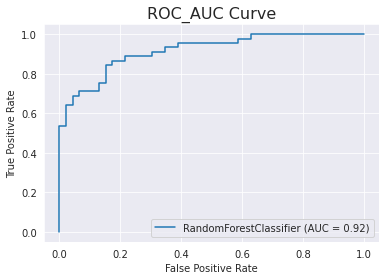

In [52]:
# prediction and model evaluation
evaluation(rfm_best)

- **Accuracy for Random Forest Classifier model is 82.4%**

## XGBoost Model

In [53]:
# import
from xgboost import XGBClassifier

In [54]:
xgb = XGBClassifier(n_jobs=-1, tree_method='gpu_hist')

xgb.fit(X_train, y_train)

[19:17:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

[[ 92   0]
 [  0 120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       120

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

Accuracy of TRAIN data: 1.0
[[34 12]
 [ 5 40]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        46
           1       0.77      0.89      0.82        45

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

Accuracy of TEST data: 0.8131868131868132


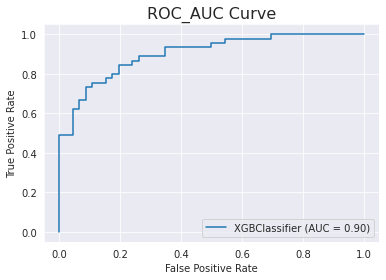

In [55]:
# prediction and model evaluation
evaluation(xgb)

### Hyper- parameter tuning

In [56]:
# hyperparameters
xgb_model = XGBClassifier(n_jobs=-1, tree_method='gpu_hist')

parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth': [2, 4, 6, 8, 10],
              'min_child_weight': [3, 7, 11, 19, 25],
              'n_estimators': [50, 100, 150, 200, 300, 500]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train, y_train)

[19:23:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method='gpu_his

In [57]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 2, 'min_child_weight': 7, 'n_estimators': 50}
0.9097670250896058
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)


[[ 80  12]
 [  9 111]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        92
           1       0.90      0.93      0.91       120

    accuracy                           0.90       212
   macro avg       0.90      0.90      0.90       212
weighted avg       0.90      0.90      0.90       212

Accuracy of TRAIN data: 0.9009433962264151
[[36 10]
 [ 4 41]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84        46
           1       0.80      0.91      0.85        45

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91

Accuracy of TEST data: 0.8461538461538461


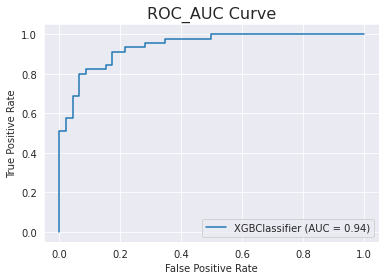

In [58]:
# prediction and evaluation
evaluation(clf_xgb.best_estimator_)

- **Accuracy for XGBoost model is 84%**

## Accuracy is highest with 90% using K-NN model

**Steps:**
- We have inspected the data for null and dtypes
- Cleaned the data as there are outliers present
- Analysed the data for insights
- Model Building and prediction:
    - 1. Logistic Regression. Accuracy: 85%
    - 2. K Nearest Neighbour. Accuracy: 90%
    - 3. Random Forest Classifier. Accuracy: 82.4%
    - 4. XGBoost Model. Accuracy: 84%

## So, finally from the above model we could see that K-NN model has the best Accuracy Score with 90%